## Electricity usage as a proxy for measuring wealth in Nigeria

In [1]:
# Importing relevant libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colorcet as cc
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [2]:
# Reading in the DHS dataset
df = pd.read_excel('../../applications/Climate Analytics/Climate Analyst/dhs.xlsx')

In [3]:
df.head()

,DHSCLUST,DHSID,DHSCC,DHSYEAR,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,num_households,has_electricity,has_radio,has_TV,has_refrigerator,has_cooking_fuel,has_mobile,has_computer,cluster_mean_wealth_index,has_air_conditioner,has_electric_iron,has_generator,has_fan,has_tricycle,has_electricity_frac,has_radio_frac,has_TV_frac,has_refrigerator_frac,has_cooking_fuel_frac,has_mobile_frac,has_computer_frac,has_air_conditioner_frac,has_electric_iron_frac,has_generator_frac,has_fan_frac,has_tricycle_frac,region_is_North Central,region_is_North East,region_is_North West,region_is_South East,region_is_South South,region_is_South West,2012_value,2015_value,2018_value,2021_value
0,1,NG201800000001,NG,2018,180,BENUE,1,North Central,GPS,U,7.720049,8.506936,30,30,24,26,19,0,29,5,114559.833333,0,25,14,27,0,1.000000,0.800000,0.866667,0.633333,0,0.966667,0.166667,0.000000,0.833333,0.466667,0.900000,0.000000,1,0,0,0,0,0,2.437877,4.133201,2.398827,4.324615
1,10,NG201800000010,NG,2018,180,BENUE,1,North Central,GPS,R,7.844626,8.581907,30,22,14,10,2,0,27,0,-74609.266667,0,4,4,8,0,0.733333,0.466667,0.333333,0.066667,0,0.900000,0.000000,0.000000,0.133333,0.133333,0.266667,0.000000,1,0,0,0,0,0,0.042517,0.305746,0.310747,0.291954
2,100,NG201800000100,NG,2018,190,KOGI,1,North Central,GPS,R,7.328636,7.438251,27,5,8,9,0,0,19,0,-36973.629630,0,0,10,1,0,0.185185,0.296296,0.333333,0.000000,0,0.703704,0.000000,0.000000,0.000000,0.370370,0.037037,0.000000,1,0,0,0,0,0,0.019770,0.212797,0.286068,0.196347
3,1000,NG201800001000,NG,2018,340,BAYELSA,5,South South,GPS,R,4.625331,6.335930,28,2,15,12,5,0,25,1,21784.392857,0,9,10,22,2,0.071429,0.535714,0.428571,0.178571,0,0.892857,0.035714,0.000000,0.321429,0.357143,0.785714,0.071429,0,0,0,0,1,0,0.302483,1.143826,3.235167,1.527085
4,1001,NG201800001001,NG,2018,340,BAYELSA,5,South South,GPS,R,4.773772,6.256648,24,1,10,4,1,0,18,0,-4896.541667,1,4,6,12,1,0.041667,0.416667,0.166667,0.041667,0,0.750000,0.000000,0.041667,0.166667,0.250000,0.500000,0.041667,0,0,0,0,1,0,0.215671,0.240867,0.519105,0.430945


In [4]:
# Note that we are only interested in all columns. Main columns used for this project include:
# URBAN_RURA, cluster_mean_wealth_index, 2012_value, 2015_value, 2018_value, 2021_value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DHSCLUST                   1389 non-null   int64  
 1   DHSID                      1389 non-null   object 
 2   DHSCC                      1389 non-null   object 
 3   DHSYEAR                    1389 non-null   int64  
 4   ADM1DHS                    1389 non-null   int64  
 5   ADM1NAME                   1389 non-null   object 
 6   DHSREGCO                   1389 non-null   int64  
 7   DHSREGNA                   1389 non-null   object 
 8   SOURCE                     1389 non-null   object 
 9   URBAN_RURA                 1389 non-null   object 
 10  LATNUM                     1389 non-null   float64
 11  LONGNUM                    1389 non-null   float64
 12  num_households             1389 non-null   int64  
 13  has_electricity            1389 non-null   int64

In [5]:
# df.isnull().sum()

In [6]:
# Dropping null values from the dataset
df = df.dropna()

## Exploratory Data Analysis

#### Urban and Rural Distribution

In [7]:
# Checking the count of urban and rural clusters within the dataset
df['URBAN_RURA'].count()

1382

In [8]:
# A function which changes the values of the urban and rural column to fully spell out the values rather than a letter
def urban_rural(x):
    if x == 'U':
        return 'URBAN'
    return 'RURAL'

In [9]:
# Applying the function the urban and rural column
df['URBAN_RURA'] = df['URBAN_RURA'].apply(urban_rural)

In [10]:
df.head()

,DHSCLUST,DHSID,DHSCC,DHSYEAR,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,num_households,has_electricity,has_radio,has_TV,has_refrigerator,has_cooking_fuel,has_mobile,has_computer,cluster_mean_wealth_index,has_air_conditioner,has_electric_iron,has_generator,has_fan,has_tricycle,has_electricity_frac,has_radio_frac,has_TV_frac,has_refrigerator_frac,has_cooking_fuel_frac,has_mobile_frac,has_computer_frac,has_air_conditioner_frac,has_electric_iron_frac,has_generator_frac,has_fan_frac,has_tricycle_frac,region_is_North Central,region_is_North East,region_is_North West,region_is_South East,region_is_South South,region_is_South West,2012_value,2015_value,2018_value,2021_value
0,1,NG201800000001,NG,2018,180,BENUE,1,North Central,GPS,URBAN,7.720049,8.506936,30,30,24,26,19,0,29,5,114559.833333,0,25,14,27,0,1.000000,0.800000,0.866667,0.633333,0,0.966667,0.166667,0.000000,0.833333,0.466667,0.900000,0.000000,1,0,0,0,0,0,2.437877,4.133201,2.398827,4.324615
1,10,NG201800000010,NG,2018,180,BENUE,1,North Central,GPS,RURAL,7.844626,8.581907,30,22,14,10,2,0,27,0,-74609.266667,0,4,4,8,0,0.733333,0.466667,0.333333,0.066667,0,0.900000,0.000000,0.000000,0.133333,0.133333,0.266667,0.000000,1,0,0,0,0,0,0.042517,0.305746,0.310747,0.291954
2,100,NG201800000100,NG,2018,190,KOGI,1,North Central,GPS,RURAL,7.328636,7.438251,27,5,8,9,0,0,19,0,-36973.629630,0,0,10,1,0,0.185185,0.296296,0.333333,0.000000,0,0.703704,0.000000,0.000000,0.000000,0.370370,0.037037,0.000000,1,0,0,0,0,0,0.019770,0.212797,0.286068,0.196347
3,1000,NG201800001000,NG,2018,340,BAYELSA,5,South South,GPS,RURAL,4.625331,6.335930,28,2,15,12,5,0,25,1,21784.392857,0,9,10,22,2,0.071429,0.535714,0.428571,0.178571,0,0.892857,0.035714,0.000000,0.321429,0.357143,0.785714,0.071429,0,0,0,0,1,0,0.302483,1.143826,3.235167,1.527085
4,1001,NG201800001001,NG,2018,340,BAYELSA,5,South South,GPS,RURAL,4.773772,6.256648,24,1,10,4,1,0,18,0,-4896.541667,1,4,6,12,1,0.041667,0.416667,0.166667,0.041667,0,0.750000,0.000000,0.041667,0.166667,0.250000,0.500000,0.041667,0,0,0,0,1,0,0.215671,0.240867,0.519105,0.430945


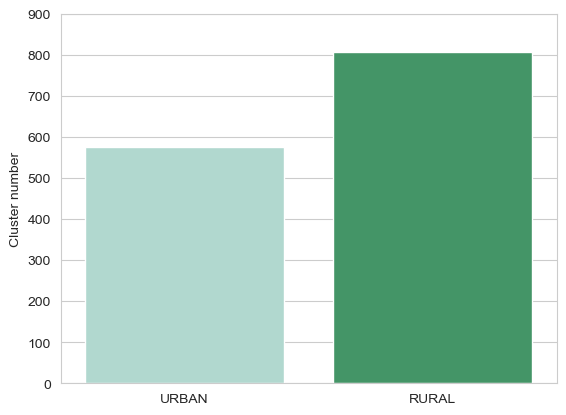

In [11]:
# Visualising the number of urban and rural clusters within the dataset
sns.countplot(x = 'URBAN_RURA', data = df, palette='BuGn')
plt.xlabel('')
plt.ylabel('Cluster number')
plt.ylim(0,900)
plt.show()
# More rural than urban clusters in the dataset
# plt.savefig('URC.png',dpi=1000)

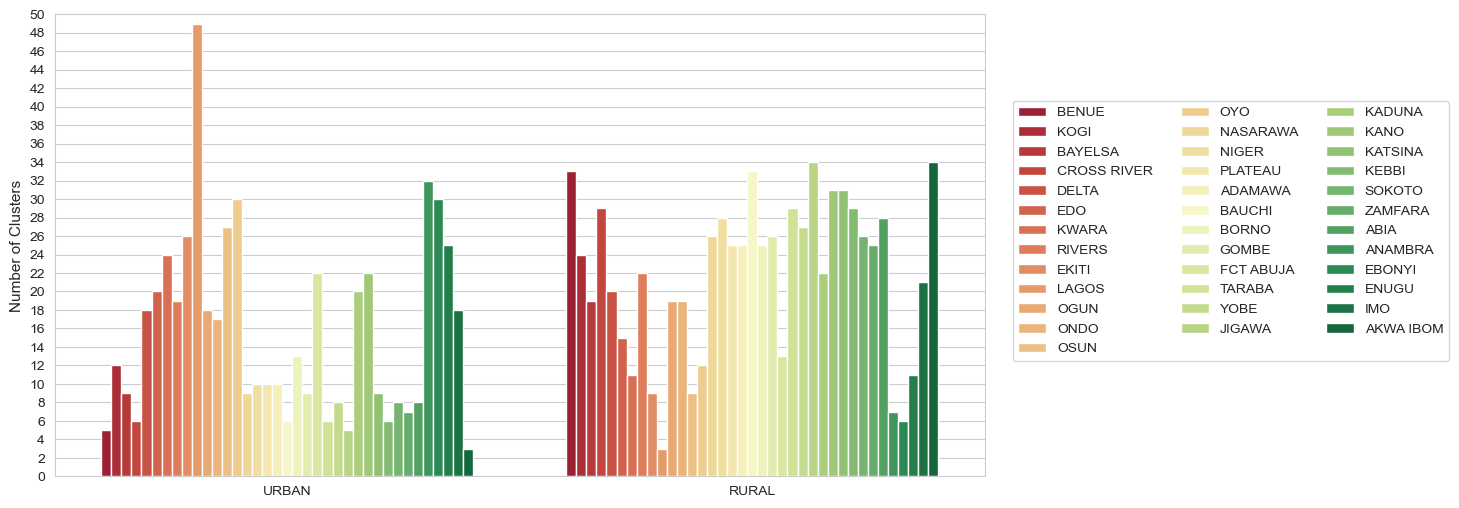

In [12]:
# Number of urban and rural clusters across Nigerian states
plt.figure(figsize=(12,6))
# palette = sns.color_palette(cc.glasbey, n_colors=37)
palette = sns.color_palette('RdYlGn', n_colors=37)
sns.countplot(x = 'URBAN_RURA', hue= 'ADM1NAME', data = df,palette=palette)

plt.legend(ncol=3, loc=(1.03,0.25))
plt.yticks(np.arange(0, 55, 2))
plt.ylim(0,50)
plt.xlabel('')
plt.ylabel('Number of Clusters', size=11)
# plt.tight_layout(2.1)
plt.show()
# plt.savefig('URC_dist.png', bbox_inches='tight', dpi=1000)

#### Mean Pixel (Nightlight) Values

In [13]:
# Creating a dataframe for the average nightlight values across the four years
nl_mean_values = pd.DataFrame(data={'Year': [2012,2015,2018,2021], 
                                    'Mean Nightlight Value':[df['2012_value'].mean(), df['2015_value'].mean(),
                                                            df['2018_value'].mean(), df['2021_value'].mean()]})

In [14]:
nl_mean_values

,Year,Mean Nightlight Value
0,2012,1.569333
1,2015,1.925078
2,2018,1.853497
3,2021,1.917140


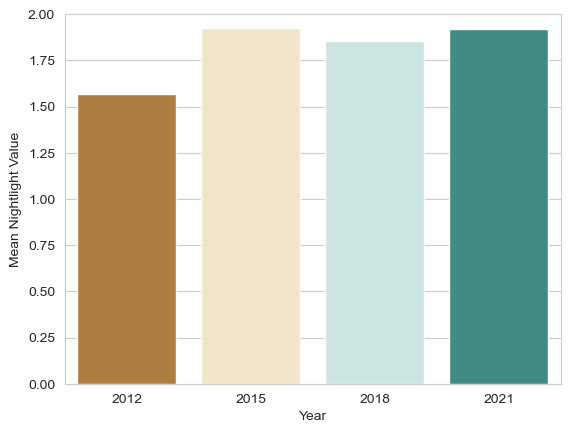

In [15]:
# Visualising the nightlight values of the four years
sns.barplot(x='Year', y='Mean Nightlight Value', data=nl_mean_values, palette='BrBG')
plt.ylim(0,2)
plt.yticks(np.arange(0, 2.25, 0.25))
plt.show()

# plt.savefig('NL_avg.png', bbox_inches='tight', dpi=1000)

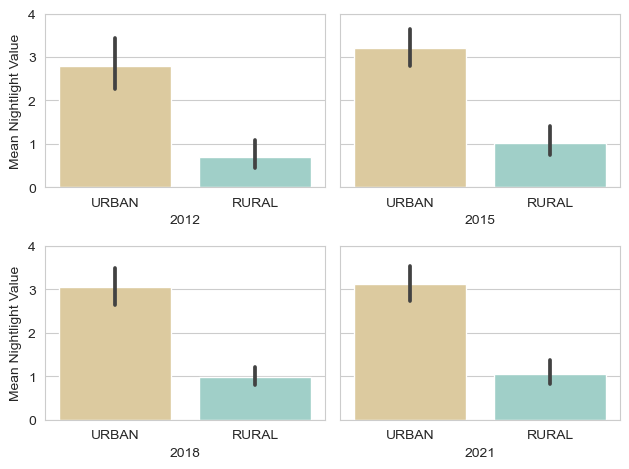

In [16]:
# Figure shows the mean nightlight values in urban and rural clusters for 2012, 2015, 2018, and 2021.
fig, axes = plt.subplots(2,2,sharey=True)
sns.barplot(data=df, x='URBAN_RURA', y='2012_value', ax=axes[0,0],palette='BrBG')
sns.barplot(data=df, x='URBAN_RURA', y='2015_value', ax=axes[0,1],palette='BrBG')
sns.barplot(data=df, x='URBAN_RURA', y='2018_value', ax=axes[1,0],palette='BrBG')
sns.barplot(data=df, x='URBAN_RURA', y='2021_value', ax=axes[1,1],palette='BrBG')

plt.ylim(0,4)
axes[0,0].set_xlabel('2012')
axes[0,0].set_ylabel('Mean Nightlight Value')

axes[0,1].set_xlabel('2015')
axes[0,1].set_ylabel('')

axes[1,0].set_xlabel('2018')
axes[1,0].set_ylabel('Mean Nightlight Value')

axes[1,1].set_xlabel('2021')
axes[1,1].set_ylabel('')

# fig.text(0.0002, 0.5, 'Nightlight value', va='center', rotation='vertical', size = 10)

plt.tight_layout()

# plt.savefig('NL_year_avg.png', bbox_inches='tight', dpi=1000)

In [17]:
df.groupby('URBAN_RURA').mean()[['2012_value','2015_value','2018_value','2021_value']]

,2012_value,2015_value,2018_value,2021_value
URBAN_RURA,,,,
RURAL,0.702084,1.010761,0.994995,1.050359
URBAN,2.782880,3.204488,3.054804,3.130032


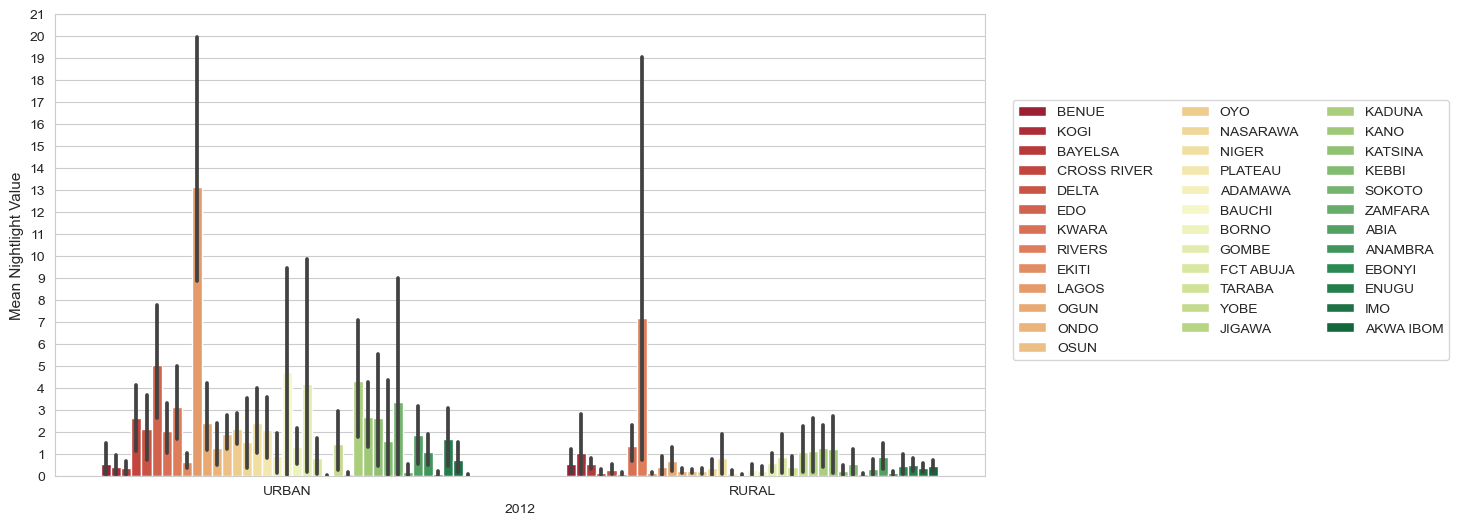

In [18]:
# Visualising the 2012 mean nightlight values of urban and rural clusters across each Nigerian state
plt.figure(figsize=(12,6))
sns.barplot(x = 'URBAN_RURA', y= '2012_value', hue= 'ADM1NAME', data = df, palette='RdYlGn')
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2012')
plt.ylabel('Mean Nightlight Value', size=11)

plt.ylim(0,21)
plt.yticks(np.arange(0, 22, 1))
plt.show()

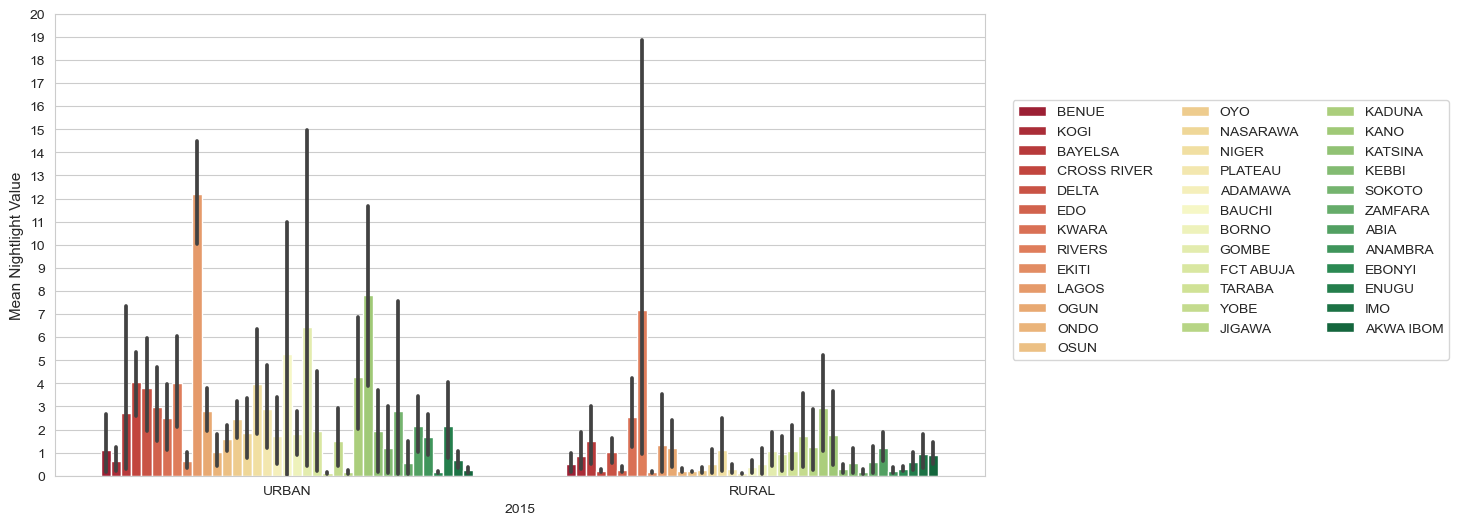

In [19]:
# Visualising the 2015 mean nightlight values of urban and rural clusters across each Nigerian state
plt.figure(figsize=(12,6))
sns.barplot(x = 'URBAN_RURA', y= '2015_value', hue= 'ADM1NAME', data = df, palette='RdYlGn')
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2015')
plt.ylabel('Mean Nightlight Value', size=11)

plt.ylim(0,20)
plt.yticks(np.arange(0, 21, 1))
plt.show()

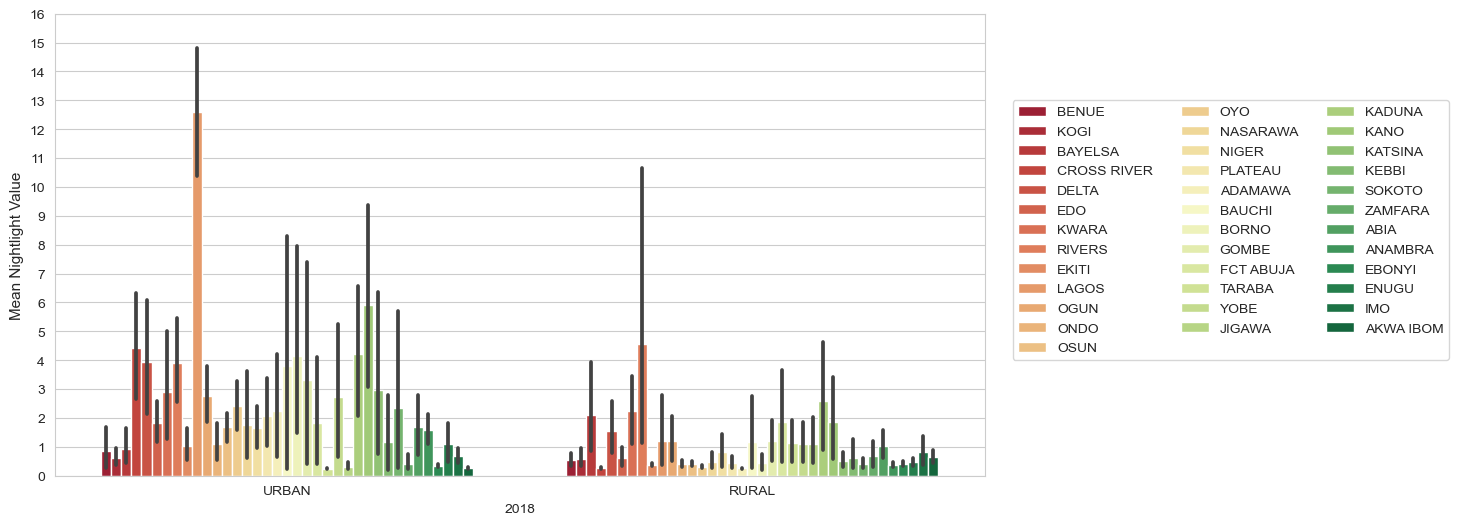

In [20]:
# Visualising the 2018 mean nightlight values of urban and rural clusters across each Nigerian state
plt.figure(figsize=(12,6))
sns.barplot(x = 'URBAN_RURA', y= '2018_value', hue= 'ADM1NAME', data = df, palette='RdYlGn')
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2018')
plt.ylabel('Mean Nightlight Value', size=11)

plt.ylim(0,16)
plt.yticks(np.arange(0, 17, 1))
plt.show()

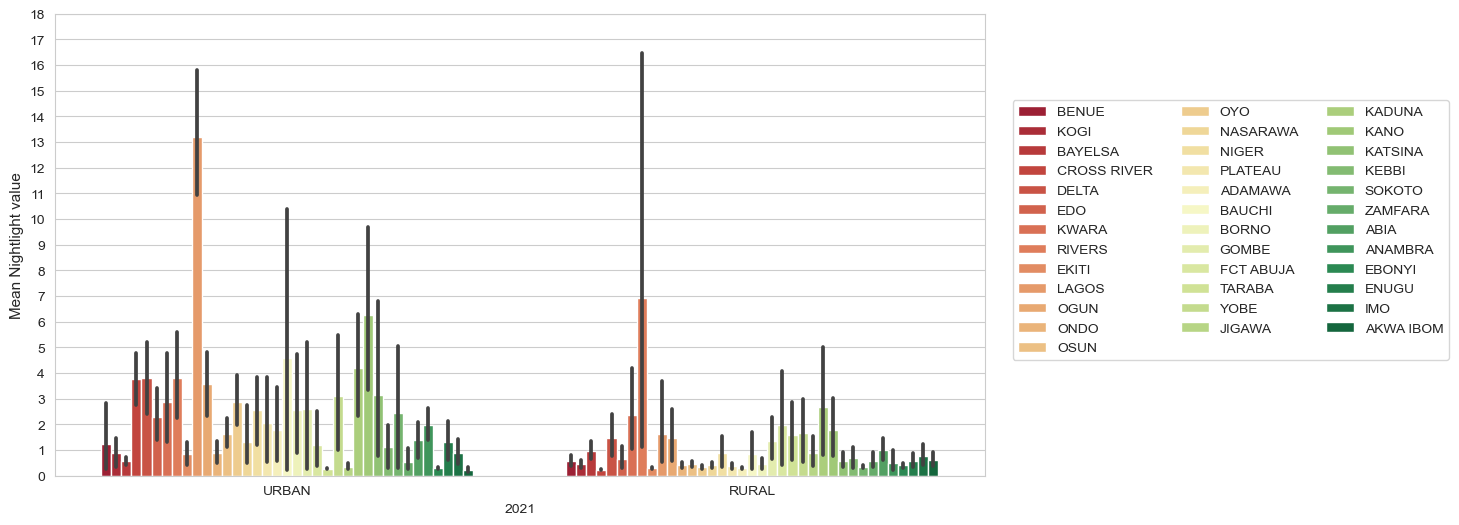

In [21]:
# Visualising the 2021 mean nightlight values of urban and rural clusters across each Nigerian state
plt.figure(figsize=(12,6))
sns.barplot(x = 'URBAN_RURA', y= '2021_value', hue= 'ADM1NAME', data = df, palette='RdYlGn')
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2021')
plt.ylabel('Mean Nightlight value', size=11)

plt.ylim(0,18)
plt.yticks(np.arange(0, 19, 1))
plt.show()

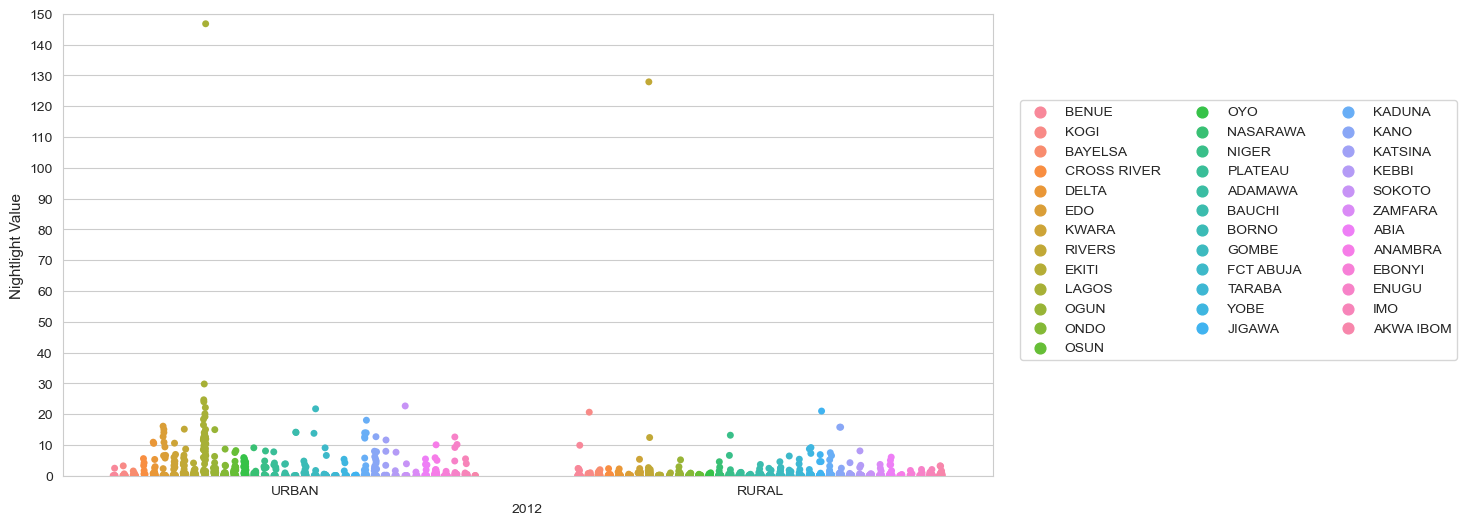

In [22]:
# Visualising the 2012 mean nightlight values of each urban and rural clusters across Nigerian states
plt.figure(figsize=(12,6))
sns.stripplot(x = 'URBAN_RURA', y= '2012_value', hue= 'ADM1NAME', data = df, dodge=True)
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2012')
plt.ylabel('Nightlight Value', size=11)

plt.ylim(0,150)
plt.yticks(np.arange(0, 160, 10))
plt.show()

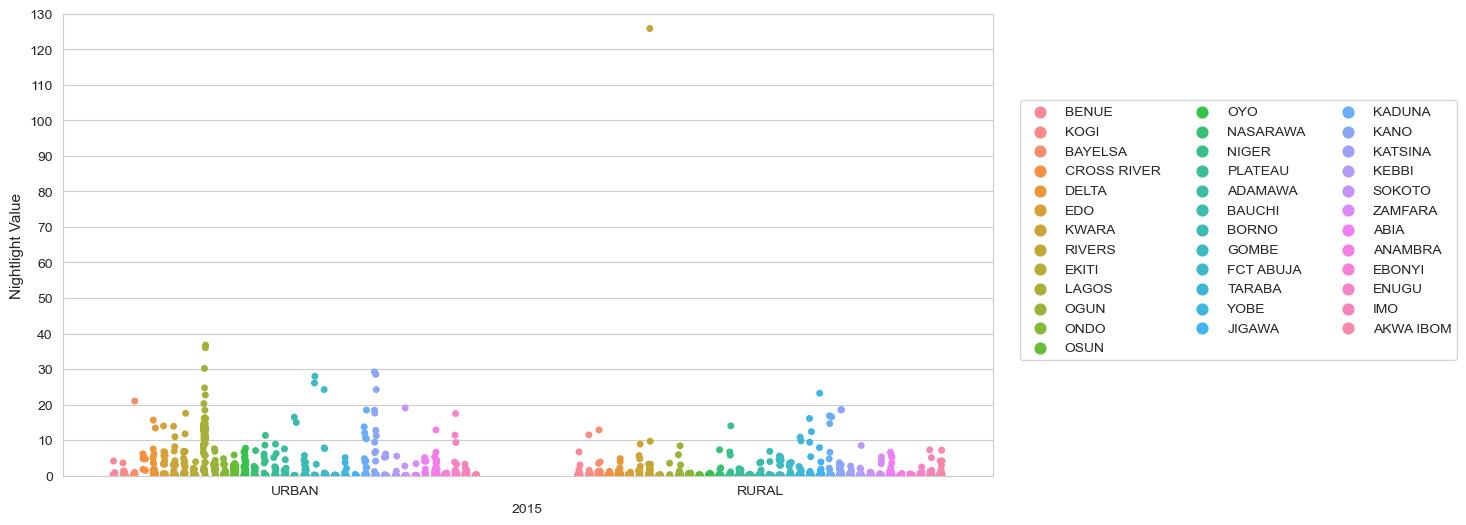

In [23]:
# Visualising the 2015 mean nightlight values of each urban and rural clusters across Nigerian states
plt.figure(figsize=(12,6))
sns.stripplot(x = 'URBAN_RURA', y= '2015_value', hue= 'ADM1NAME', data = df, dodge=True)
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2015')
plt.ylabel('Nightlight Value', size=11)

plt.ylim(0,130)
plt.yticks(np.arange(0, 140, 10))
plt.show()

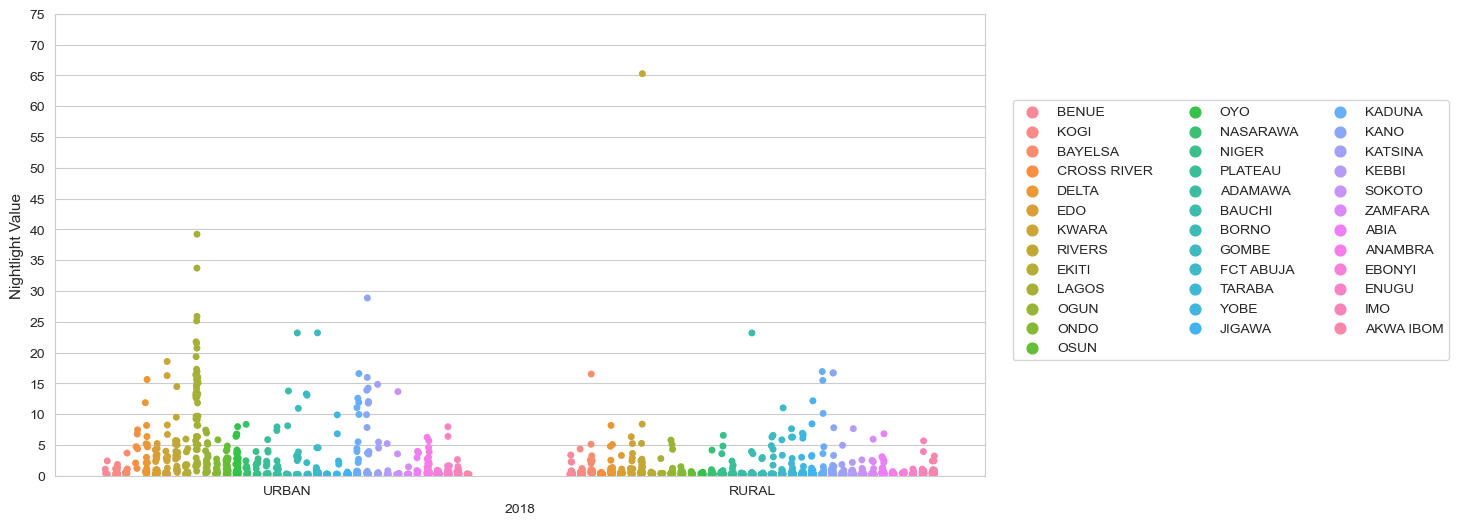

In [24]:
# Visualising the 2018 mean nightlight values of each urban and rural clusters across Nigerian states
plt.figure(figsize=(12,6))
sns.stripplot(x = 'URBAN_RURA', y= '2018_value', hue= 'ADM1NAME', data = df, dodge=True)
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2018')
plt.ylabel('Nightlight Value', size=11)

plt.ylim(0,70)
plt.yticks(np.arange(0, 80, 5))
plt.show()

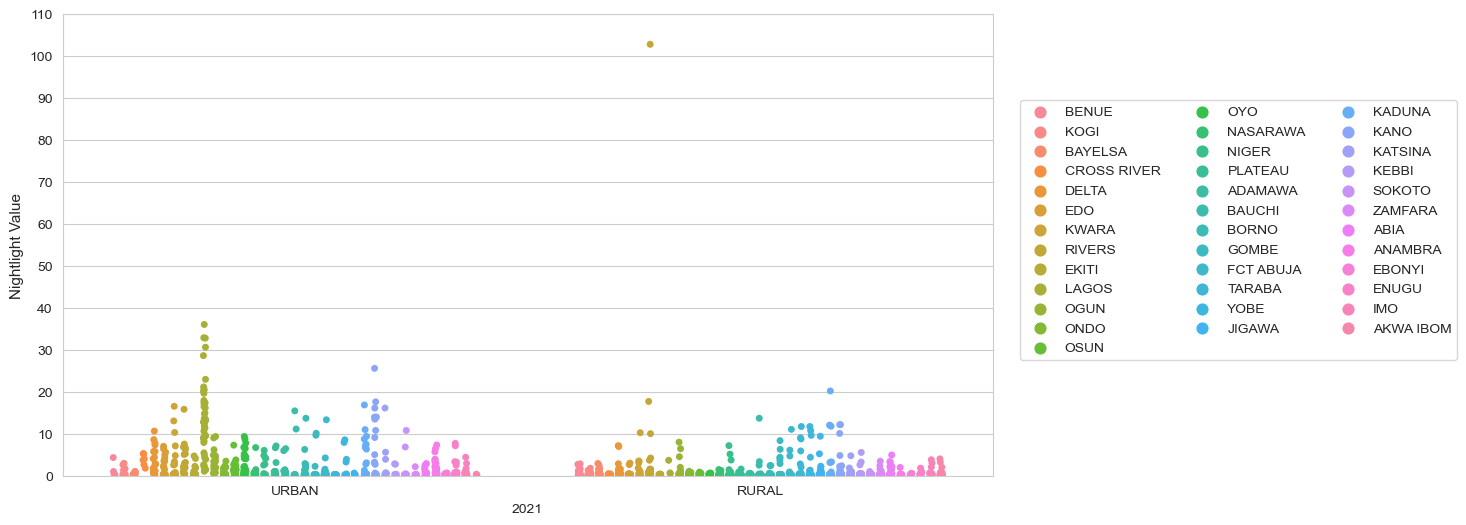

In [25]:
# Visualising the 2021 mean nightlight values of each urban and rural clusters across Nigerian states
plt.figure(figsize=(12,6))
sns.stripplot(x = 'URBAN_RURA', y= '2021_value', hue= 'ADM1NAME', data = df, dodge=True)
plt.legend(ncol=3, loc=(1.03,0.25))

plt.xlabel('2021')
plt.ylabel('Nightlight Value', size=11)

plt.ylim(0,110)
plt.yticks(np.arange(0, 120, 10))
plt.show()

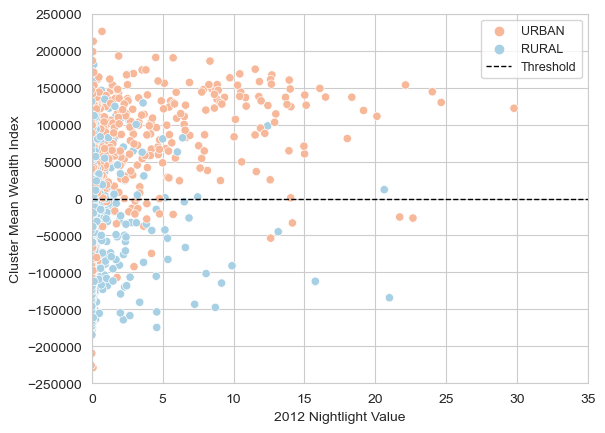

In [26]:
sns.scatterplot(x='2012_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu')

plt.xlabel('2012 Nightlight Value')
plt.ylabel('Cluster Mean Wealth Index')
plt.axhline(y=0,linewidth=1,color = 'black', label = 'Threshold',ls='--')

plt.legend(title='')
plt.ylim(0,250000)
plt.xlim(0,35)
plt.yticks(np.arange(-250000, 260000, 50000))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title = '', fontsize=9)
plt.show()

# plt.savefig('corr_2012', bbox_inches='tight', dpi=1000)

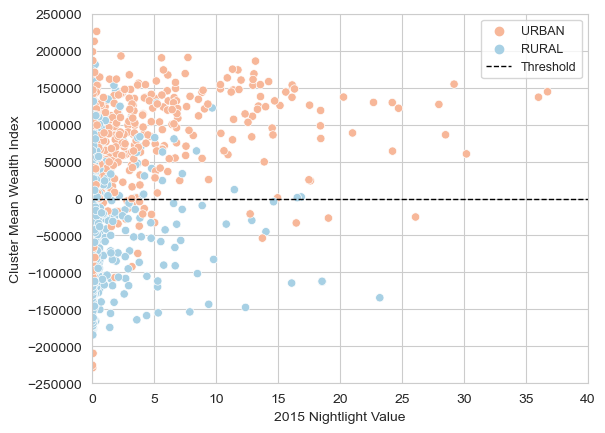

In [27]:
sns.scatterplot(x='2015_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu')

plt.xlabel('2015 Nightlight Value')
plt.ylabel('Cluster Mean Wealth Index')
plt.axhline(y=0,linewidth=1,color = 'black', label = 'Threshold',ls='--')

plt.legend(title='')
plt.ylim(0,250000)
plt.xlim(0,40)
plt.yticks(np.arange(-250000, 260000, 50000))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title = '', fontsize=9)
plt.show()

# plt.savefig('corr_2015', bbox_inches='tight', dpi=1000)

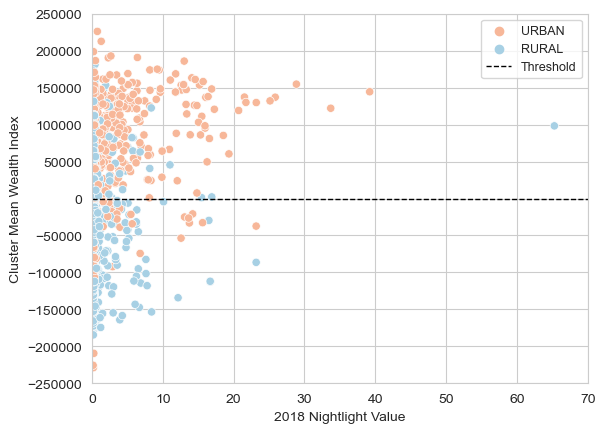

In [28]:
sns.scatterplot(x='2018_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu')

plt.xlabel('2018 Nightlight Value')
plt.ylabel('Cluster Mean Wealth Index')
plt.axhline(y=0,linewidth=1,color = 'black', label = 'Threshold',ls='--')

plt.legend(title='')
plt.ylim(0,250000)
plt.xlim(0,70)
plt.yticks(np.arange(-250000, 260000, 50000))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title = '', fontsize=9)
plt.show()

# plt.savefig('corr_2018', bbox_inches='tight', dpi=1000)

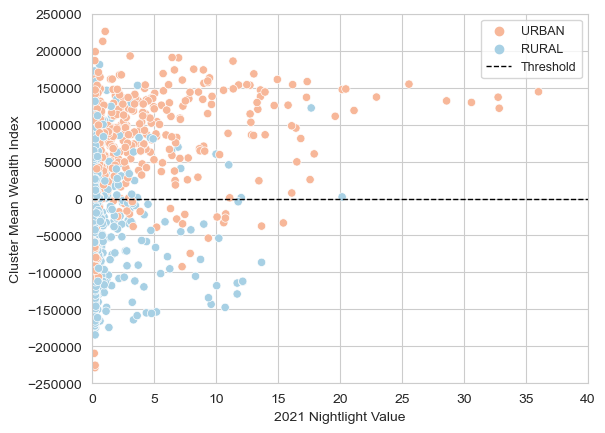

In [29]:
sns.scatterplot(x='2021_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu')

plt.xlabel('2021 Nightlight Value')
plt.ylabel('Cluster Mean Wealth Index')
plt.axhline(y=0,linewidth=1,color = 'black', label = 'Threshold',ls='--')

plt.legend(title='')
plt.ylim(0,250000)
plt.xlim(0,40)
plt.yticks(np.arange(-250000, 260000, 50000))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title = '', fontsize=9)
plt.show()

# plt.savefig('corr_2021', bbox_inches='tight', dpi=1000)

### Filtering rural households based on defined wealth levels and Nightliight values across the years

##### CMWI at 5,000 and NL Pixel Value at 5

In [31]:
df[(df["2015_value"] >= 5) & (df["cluster_mean_wealth_index"] >= 5000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

10

In [32]:
df[(df["2018_value"] >= 5) & (df["cluster_mean_wealth_index"] >= 5000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

9

In [33]:
df[(df["2021_value"] >= 5) & (df["cluster_mean_wealth_index"] >= 5000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

7

In [30]:
df[(df["2012_value"] >= 5) & (df["cluster_mean_wealth_index"] >= 5000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

5

In [59]:
df[(df["2012_value"] >= 5) & (df["cluster_mean_wealth_index"] >= 5000) & (df["URBAN_RURA"] == 'RURAL')][['URBAN_RURA', 'num_households', 'cluster_mean_wealth_index']]

,URBAN_RURA,num_households,cluster_mean_wealth_index
158,RURAL,26,98267.000000
178,RURAL,26,122539.807692
1041,RURAL,30,82084.166667
1146,RURAL,30,62974.233333
1256,RURAL,30,12010.466667


In [64]:
df[(df["2021_value"] >= 5) & (df["cluster_mean_wealth_index"] >= 5000) & (df["URBAN_RURA"] == 'RURAL')][['URBAN_RURA', 'num_households', 'cluster_mean_wealth_index']]

,URBAN_RURA,num_households,cluster_mean_wealth_index
84,RURAL,24,40692.416667
86,RURAL,30,69616.866667
158,RURAL,26,98267.000000
165,RURAL,27,60065.740741
178,RURAL,26,122539.807692
307,RURAL,30,64368.000000
977,RURAL,30,45511.900000


##### CMWI at 10,000 and NL Pixel Value at 10

In [34]:
df[(df["2012_value"] >= 10) & (df["cluster_mean_wealth_index"] >= 10000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

3

In [35]:
df[(df["2015_value"] >= 10) & (df["cluster_mean_wealth_index"] >= 10000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

2

In [36]:
df[(df["2018_value"] >= 10) & (df["cluster_mean_wealth_index"] >= 10000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

2

In [37]:
df[(df["2021_value"] >= 10) & (df["cluster_mean_wealth_index"] >= 10000) & (df["URBAN_RURA"] == 'RURAL')].count()['num_households']

4

In [38]:
# Creating Dataframe for filtered values on CMWI and Nighlight value
CMWI_NLvalue1 = pd.DataFrame(data={'Year': [2012,2015,2018,2021], 
                                    'Number of rural clusters':[5,10,9,7]})

CMWI_NLvalue2 = pd.DataFrame(data={'Year': [2012,2015,2018,2021], 
                                    'Number of rural clusters':[3,2,2,4]})


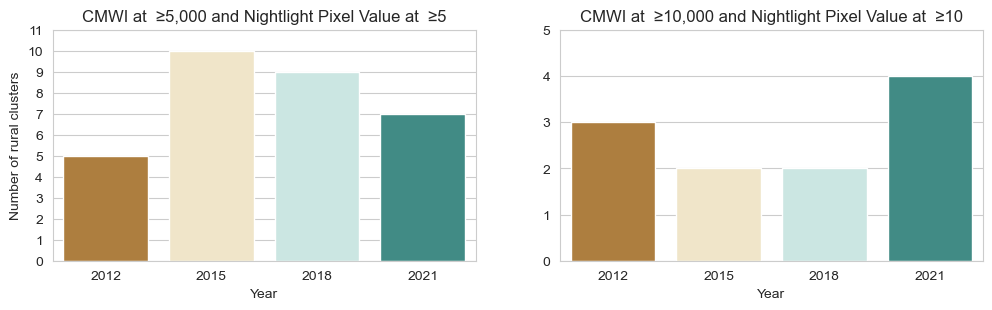

In [39]:
# Visualising filtered rural clusters based on CMWI and Nightlight Pixel Values
fig, axes = plt.subplots(1,2, figsize=(12,3))
sns.barplot(x='Year', y='Number of rural clusters', data=CMWI_NLvalue1, ax=axes[0],palette='BrBG')
sns.barplot(x='Year', y='Number of rural clusters', data=CMWI_NLvalue2, ax=axes[1],palette='BrBG')

axes[0].set_title("CMWI at  ≥5,000 and Nightlight Pixel Value at  ≥5")
axes[0].set_ylim(0,11)
axes[0].set_yticks(np.arange(0, 12, 1))

axes[1].set_title("CMWI at  ≥10,000 and Nightlight Pixel Value at  ≥10")
axes[1].set_ylim(0,5)
axes[1].set_ylabel('')
plt.show()

# plt.savefig('Filtered CMWI and NL', bbox_inches='tight', dpi=1000)

#### Exploratory Data Analysis for State Grouping

In [40]:
# Grouping Nigerian states
df_states = df.groupby('ADM1NAME')

In [41]:
no_clusters = df.groupby('ADM1NAME').count()

In [42]:
# Assessing the mean nightlight value for the four years across each Nigerian state
df_states = df_states.mean()[['2012_value', '2015_value', '2018_value', '2021_value', 'cluster_mean_wealth_index']]

In [43]:
new_column_names = {'2012_value': '2012', '2015_value': '2015', '2018_value': '2018', '2021_value': '2021',
                   'cluster_mean_wealth_index': 'Cluster Mean Wealth Index'}
df_states.rename(columns=new_column_names, inplace=True)

In [44]:
df_states

,2012,2015,2018,2021,Cluster Mean Wealth Index
ADM1NAME,,,,,
ABIA,1.059225,1.397330,1.174553,1.087942,76896.525886
ADAMAWA,0.278678,0.570027,0.823671,0.719170,-34780.632708
AKWA IBOM,0.406309,0.848501,0.610704,0.571093,25087.108722
ANAMBRA,0.920548,1.423108,1.358319,1.710177,65301.967334
BAUCHI,0.943574,1.134179,1.568913,1.410419,-83399.933167
BAYELSA,0.482072,1.881943,1.716050,0.839307,27004.607147
BENUE,0.529040,0.578917,0.590843,0.650053,-26961.714035
BORNO,0.580409,0.946862,1.712166,1.166456,-49877.386091
CROSS RIVER,0.559593,0.867145,0.979172,0.845183,2173.358625


In [45]:
df_states
sample1 = df_states.iloc[0:6][['2012','2015','2018','2021']]
sample2 = df_states.iloc[6:12][['2012','2015','2018','2021']]
sample3 = df_states.iloc[12:18][['2012','2015','2018','2021']]
sample4 = df_states.iloc[18:24][['2012','2015','2018','2021']]
sample5 = df_states.iloc[24:30][['2012','2015','2018','2021']]
sample6 = df_states.iloc[30:][['2012','2015','2018','2021']]

In [46]:
sample1.reset_index(inplace=True)
sample2.reset_index(inplace=True)
sample3.reset_index(inplace=True)
sample4.reset_index(inplace=True)
sample5.reset_index(inplace=True)
sample6.reset_index(inplace=True)

In [47]:
sample1 = pd.melt(sample1, id_vars=['ADM1NAME'], var_name='Year', value_name='Nightlight Value')
sample2 = pd.melt(sample2, id_vars=['ADM1NAME'], var_name='Year', value_name='Nightlight Value')
sample3 = pd.melt(sample3, id_vars=['ADM1NAME'], var_name='Year', value_name='Nightlight Value')
sample4 = pd.melt(sample4, id_vars=['ADM1NAME'], var_name='Year', value_name='Nightlight Value')
sample5 = pd.melt(sample5, id_vars=['ADM1NAME'], var_name='Year', value_name='Nightlight Value')
sample6 = pd.melt(sample6, id_vars=['ADM1NAME'], var_name='Year', value_name='Nightlight Value')

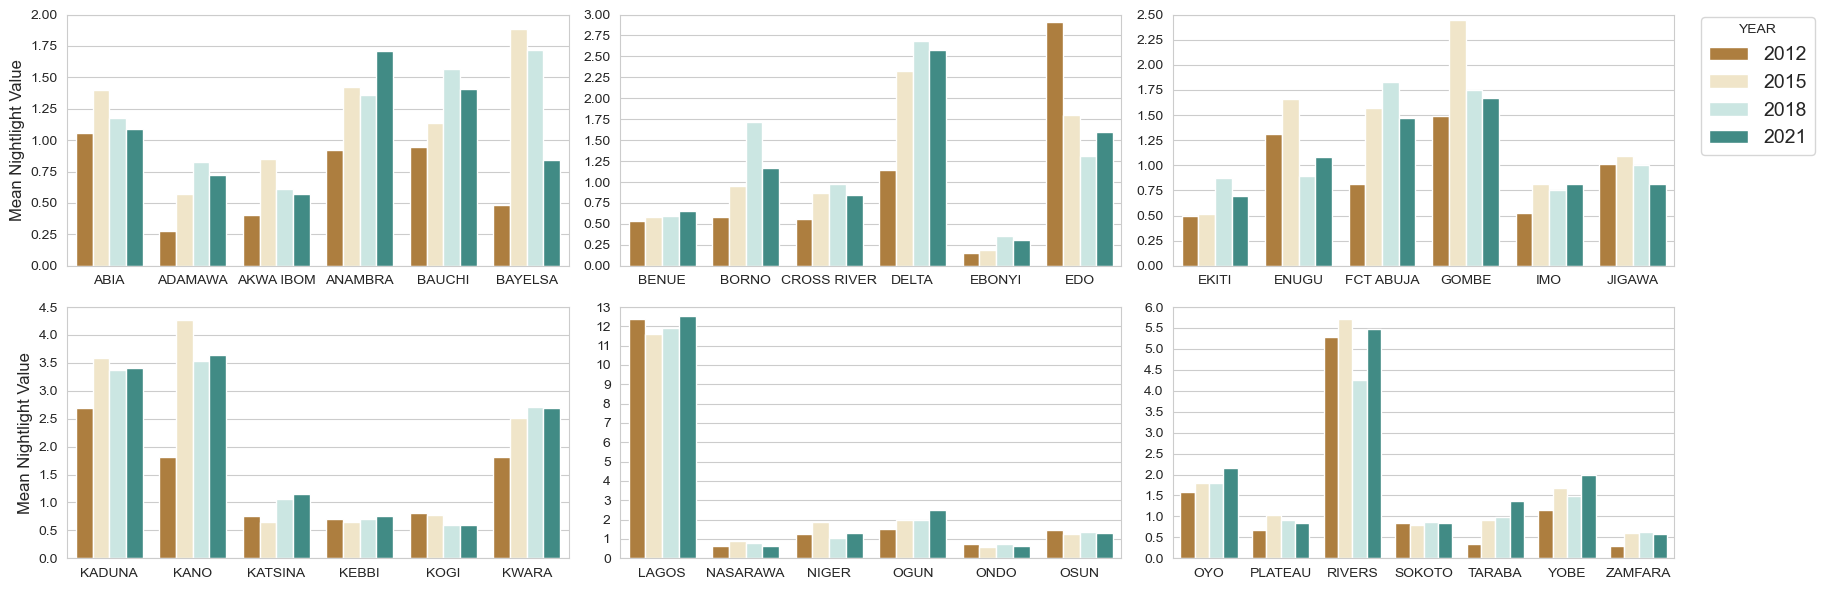

In [48]:
fig, axes = plt.subplots(2,3, figsize=(18,6))

sns.barplot(data=sample1, x='ADM1NAME', y='Nightlight Value', hue= 'Year', ax=axes[0,0],palette='BrBG')
sns.barplot(data=sample2, x='ADM1NAME', y='Nightlight Value', hue= 'Year', ax=axes[0,1],palette='BrBG')
sns.barplot(data=sample3, x='ADM1NAME', y='Nightlight Value', hue= 'Year', ax=axes[0,2],palette='BrBG')
sns.barplot(data=sample4, x='ADM1NAME', y='Nightlight Value', hue= 'Year', ax=axes[1,0],palette='BrBG')
sns.barplot(data=sample5, x='ADM1NAME', y='Nightlight Value', hue= 'Year', ax=axes[1,1],palette='BrBG')
sns.barplot(data=sample6, x='ADM1NAME', y='Nightlight Value', hue= 'Year', ax=axes[1,2],palette='BrBG')

# plt.ylim(0,4)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Mean Nightlight Value',size=12)
axes[0,0].set_ylim(0,2)
axes[0,0].legend().set_visible(False)

axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_ylim(0,3)
axes[0,1].set_yticks(np.arange(0, 3.25, 0.25))
axes[0,1].legend().set_visible(False)

axes[0,2].set_xlabel('')
axes[0,2].set_ylabel('')
axes[0,2].set_ylim(0,2.5)
axes[0,2].set_yticks(np.arange(0, 2.75, 0.25))
axes[0,2].legend(loc='upper right', bbox_to_anchor=(1.3, 1.03), title = 'YEAR', fontsize=14)

axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Mean Nightlight Value',size=12)
axes[1,0].set_ylim(0,4.5)
axes[1,0].set_yticks(np.arange(0, 5, 0.5))
axes[1,0].legend().set_visible(False)

axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')
axes[1,1].set_ylim(0,13)
axes[1,1].set_yticks(np.arange(0, 14, 1))
axes[1,1].legend().set_visible(False)

axes[1,2].set_xlabel('')
axes[1,2].set_ylabel('')
axes[1,2].set_ylim(0,6)
axes[1,2].set_yticks(np.arange(0, 6.5, 0.5))
axes[1,2].legend().set_visible(False)

# for ax in axes.flat:
#     ax.legend().set_visible(False)

# legend_labels = ['2012','2015','2018','2021']
# fig.legend(loc='upper right', bbox_to_anchor=(1.08, 0.65), labels=sample1['Year'].unique(), fontsize=16)
# fig.subplots_adjust(right=0.85)

plt.tight_layout()
# fig.text(0.0002, 0.5, 'Nigerian States', va='center', rotation='vertical', size = 10)

# plt.savefig('NL_states_avg.png', bbox_inches='tight', dpi=1000)

In [49]:
df_states

,2012,2015,2018,2021,Cluster Mean Wealth Index
ADM1NAME,,,,,
ABIA,1.059225,1.397330,1.174553,1.087942,76896.525886
ADAMAWA,0.278678,0.570027,0.823671,0.719170,-34780.632708
AKWA IBOM,0.406309,0.848501,0.610704,0.571093,25087.108722
ANAMBRA,0.920548,1.423108,1.358319,1.710177,65301.967334
BAUCHI,0.943574,1.134179,1.568913,1.410419,-83399.933167
BAYELSA,0.482072,1.881943,1.716050,0.839307,27004.607147
BENUE,0.529040,0.578917,0.590843,0.650053,-26961.714035
BORNO,0.580409,0.946862,1.712166,1.166456,-49877.386091
CROSS RIVER,0.559593,0.867145,0.979172,0.845183,2173.358625


In [50]:
df_states_sorted = df_states.sort_values(by='Cluster Mean Wealth Index')

In [51]:
df_states_sorted.reset_index(inplace=True)

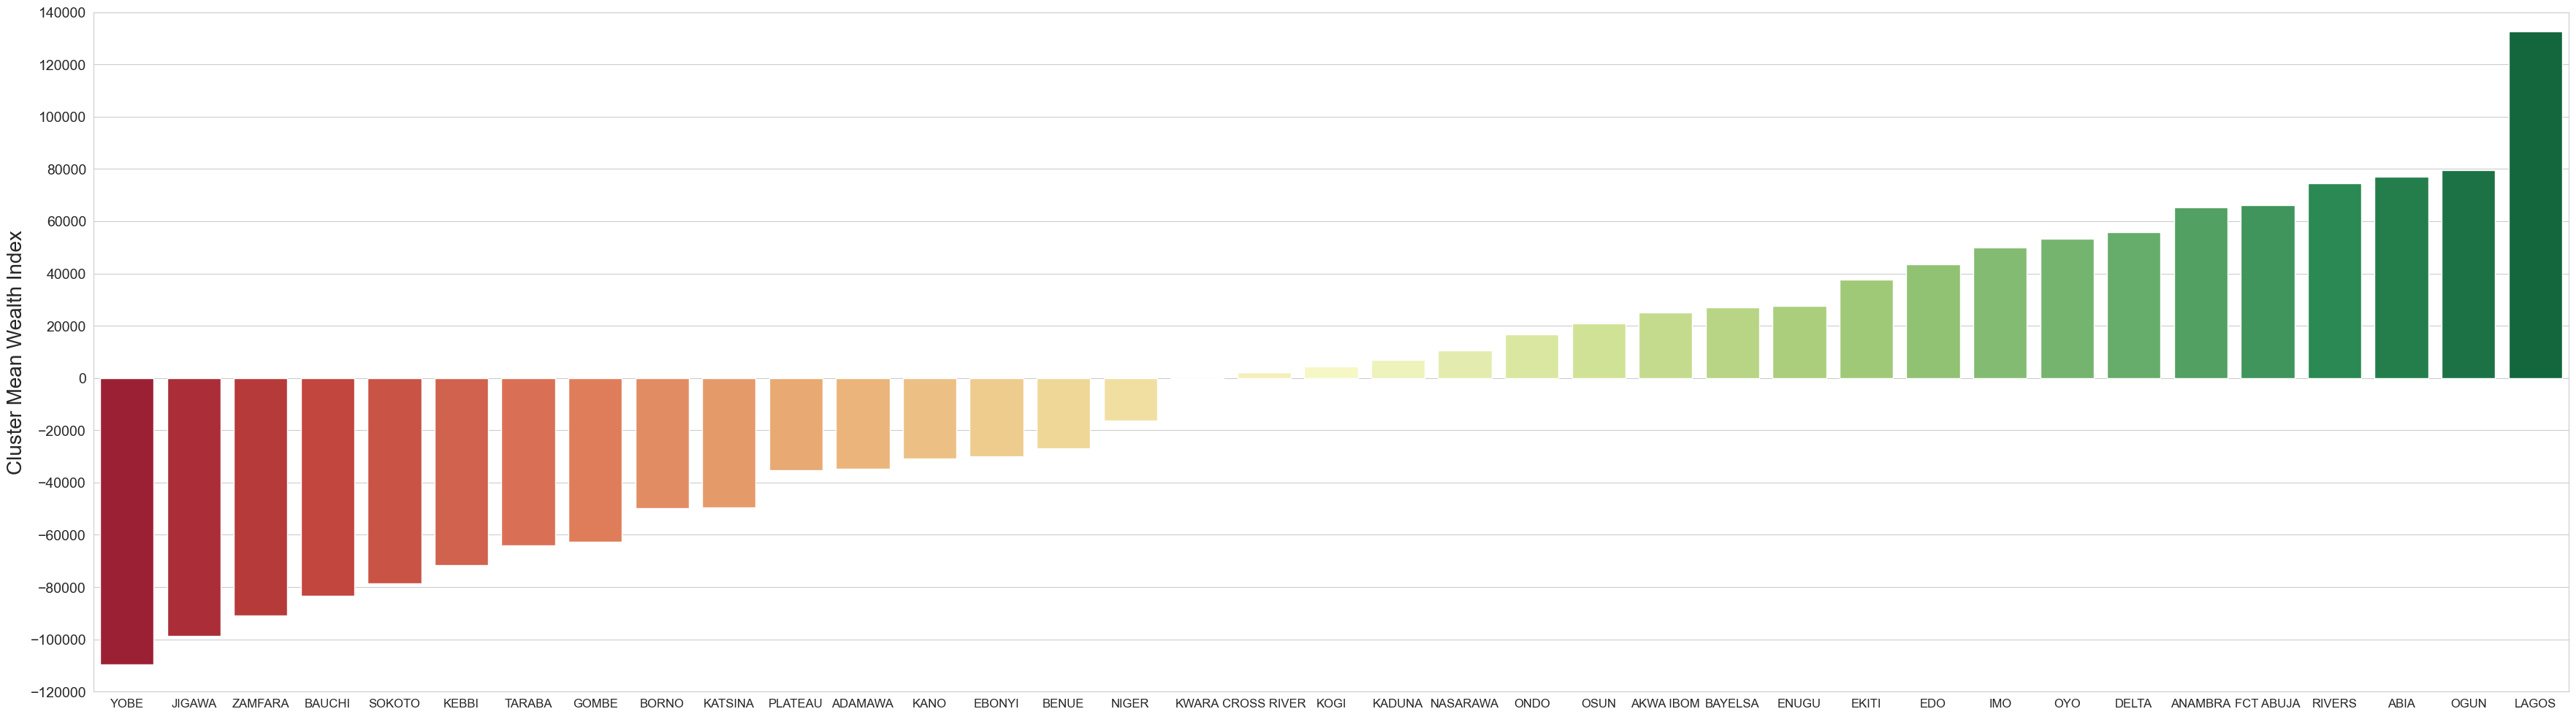

In [52]:
# Mapping the cluster mean wealth index for each Nigerian State
plt.figure(figsize=(35,10))
sns.barplot(data=df_states_sorted, x='ADM1NAME', y='Cluster Mean Wealth Index', palette='RdYlGn')
plt.tight_layout()

plt.ylim(0,140000)
plt.yticks(np.arange(-120000, 160000, 20000))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Cluster Mean Wealth Index', size=20)
plt.show()

In [53]:
CMWI_highest = df_states_sorted.iloc[27:]

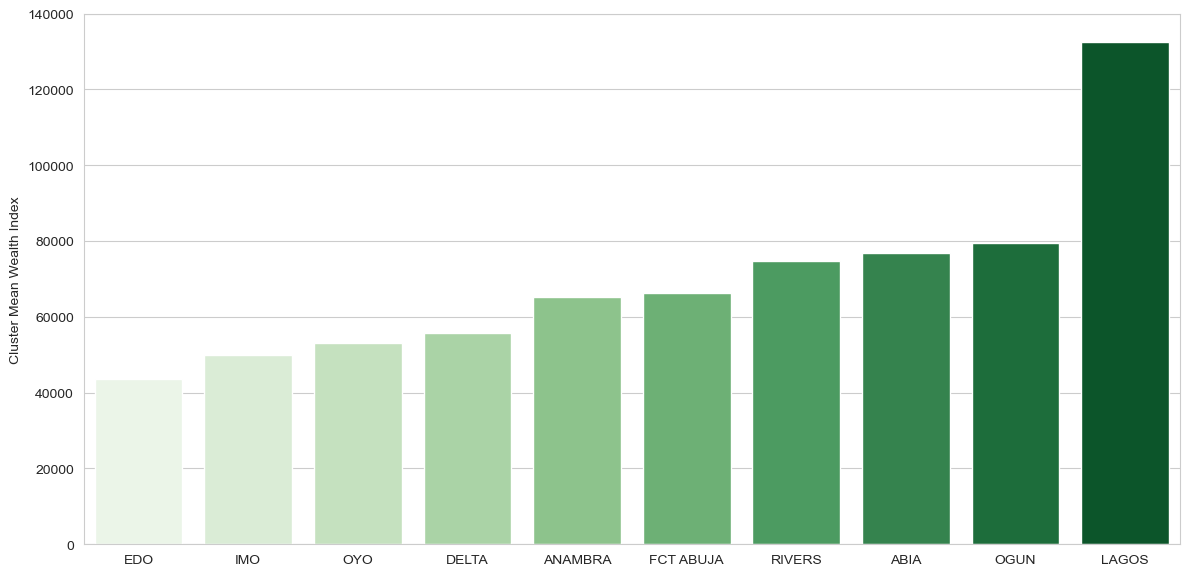

In [54]:
#State clusters with the highest nightlight value (i.e., Lagos and Rivers) are amongst the states with highest CMWI
#This illustrates that there is a causal relationship between electricity access and wealth
plt.figure(figsize=(12,6))
sns.barplot(data=CMWI_highest, x='ADM1NAME', y='Cluster Mean Wealth Index', palette='Greens')
plt.tight_layout()

plt.ylim(0,140000)
plt.yticks(np.arange(0, 160000, 20000))
plt.xlabel('')
plt.show()

In [55]:
# df_states[(df_states['ADM1NAME'] == 'KANO') | (df_states['ADM1NAME'] == 'LAGOS') | (df_states['ADM1NAME'] == 'RIVERS')]

In [56]:
# fig, axes = plt.subplots(2,2,sharey=True)
# sns.scatterplot(x='2012_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu', ax=axes[0,0])
# sns.scatterplot(x='2015_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu', ax=axes[0,1])
# sns.scatterplot(x='2018_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu', ax=axes[1,0])
# sns.scatterplot(x='2021_value',y='cluster_mean_wealth_index',data=df,hue='URBAN_RURA',palette='RdBu', ax=axes[1,1])

# axes[0,0].set_xlabel('2012 Nightlight Value')
# axes[0,0].set_ylabel('Cluster Mean Wealth Index')
# plt.axvline(x=21.43,linewidth=1,color = 'black', label = 'Threshold')
# axes[0,0].legend('')
# # axes[0,0].ylim(0,250000)
# # axes[0,0].xlim(0,35)
# # axes[0,0].yticks(np.arange(-250000, 260000, 50000))

# axes[0,1].set_xlabel('2015 Nightlight Value')
# axes[0,1].set_ylabel('Cluster Mean Wealth Index')
# plt.axvline(x=23.7,linewidth=1,color = 'black', label = 'Threshold')
# axes[0,1].legend('')
# # axes[0,1].ylim(0,250000)
# # axes[0,1].xlim(0,40)
# # axes[0,1].yticks(np.arange(-250000, 260000, 50000))

# axes[1,0].set_xlabel('2018 Nightlight Value')
# axes[1,0].set_ylabel('Cluster Mean Wealth Index')
# axes[1,0].legend('')
# # axes[1,0].ylim(0,250000)
# # axes[1,0].xlim(0,70)
# # axes[1,0].yticks(np.arange(-250000, 260000, 50000))

# axes[1,1].set_xlabel('2021 Nightlight Value')
# axes[1,1].set_ylabel('Cluster Mean Wealth Index')
# plt.axvline(x=20.6,linewidth=1,color = 'black', label = 'Threshold')
# axes[1,1].legend('')
# # axes[1,1].ylim(0,250000)
# # axes[1,1].xlim(0,40)
# # axes[1,1].yticks(np.arange(-250000, 260000, 50000))

# plt.tight_layout()



# fig.text(0.0002, 0.5, 'Nightlight value', va='center', rotation='vertical', size = 10)

